<a href="https://colab.research.google.com/github/jeojildo/fundamentos-int-comp-ciencia-dados/blob/main/Atividade_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Atividade 3:  Sample distribution and sampling distribution, TLC and p-value**

---------------------------------------------------------------

**Fundamentos Inteligência Computacional e Ciência de Dados**

---------------------------------------------------------------

Discente: Jeojildo Pereira


Matricula: 202220070022


Docente: Prof. Dr. Claudomiro de Sousa de Sales Junior

---------------------------------------------------------------

##A:  Sample distribution and sampling distribution

A partir do que foi feito na Atividade 2 “Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho”, crie  uma população artificial dessa variável com uma distribuição Gaussiana e demonstre sample distribution and sampling distribution. Faça avaliações de probabilidade de possíveis eventos

**Distribuição normal ou distribuição Gaussiana**


Total população artificial = 18100 (Total docente PPGCC = 1810 x 10 publicações cada docente durante 2014 a 2023), (5 publicações=média e standard deviation=2)


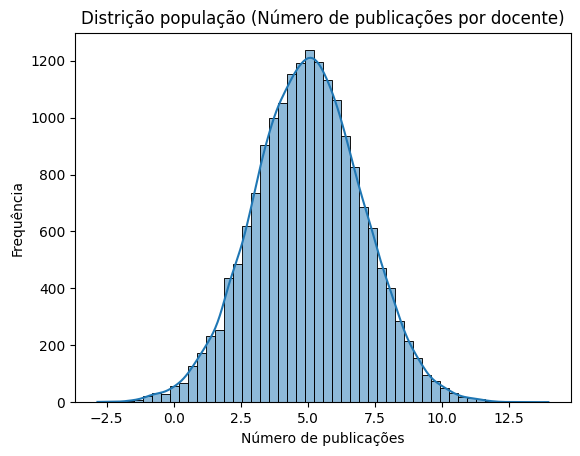

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Criando uma população artificial com distribuição normal ou distribuição Gaussiana
np.random.seed(42)
população = np.random.normal(loc=5, scale=2, size=18100)  # (5 publicações média), Standard deviation=2

# Visualizacao
sns.histplot(população, kde=True, bins=50)
plt.title("Distrição população (Número de publicações por docente)")
plt.xlabel("Número de publicações")
plt.ylabel("Frequência")
plt.show()

**Sample Distribution**

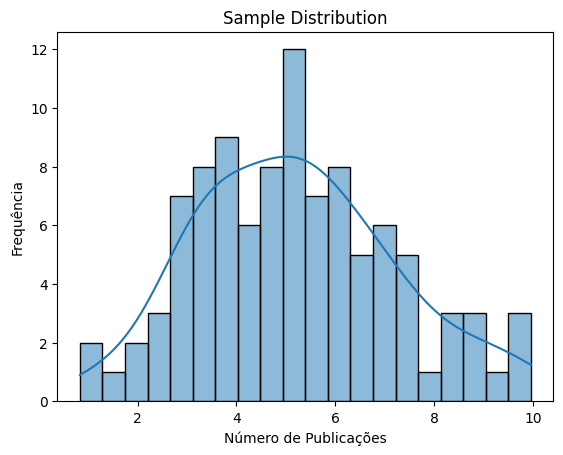

In [32]:
sample = np.random.choice(população, size=100, replace=False)

# Visualizacao Sample Distribution
sns.histplot(sample, kde=True, bins=20)
plt.title("Sample Distribution")
plt.xlabel("Número de Publicações")
plt.ylabel("Frequência")
plt.show()

**Sampling Distribution of the Mean**

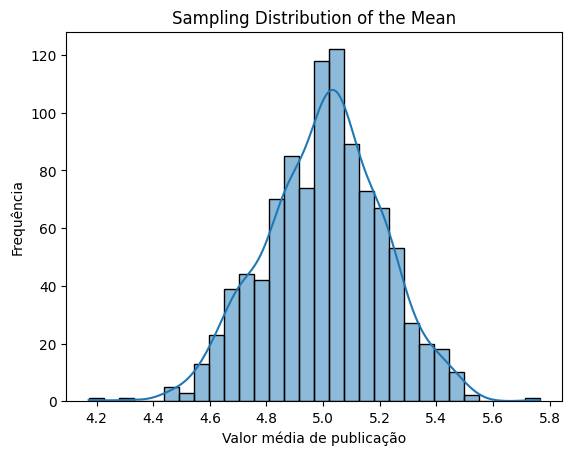

In [33]:
mean_sample = []

for _ in range(1000):
    sample = np.random.choice(população, size=100, replace=False)
    mean_sample.append(np.mean(sample))

# Visualizacao Sampling Distribution of the Mean
sns.histplot(mean_sample, kde=True, bins=30)
plt.title("Sampling Distribution of the Mean")
plt.xlabel("Valor média de publicação")
plt.ylabel("Frequência")
plt.show()

**Avaliações de probabilidade de possíveis eventos**

In [34]:
#Probabilidade de um professor que tem > 8 publicações
prob_gt_8 = np.mean(população > 8)
print(f"Probabilidade > 8 publicação: {prob_gt_8:.3f}")

Probabilidade > 8 publicação: 0.069


In [35]:
#Probabilidade média de 100 professor que tem > 6 publicações
prob_sample_mean_gt_6 = np.mean(np.array(mean_sample) > 6)
print(f"Probabilidade média de 100 professor > 6 publicações: {prob_sample_mean_gt_6:.3f}")

Probabilidade média de 100 professor > 6 publicações: 0.000


# B: The Central Limit Theorem
**Aplique o TLC a função de distribuição gama e avalie quatro diferentes tamanhos de amostra, começando em 10**

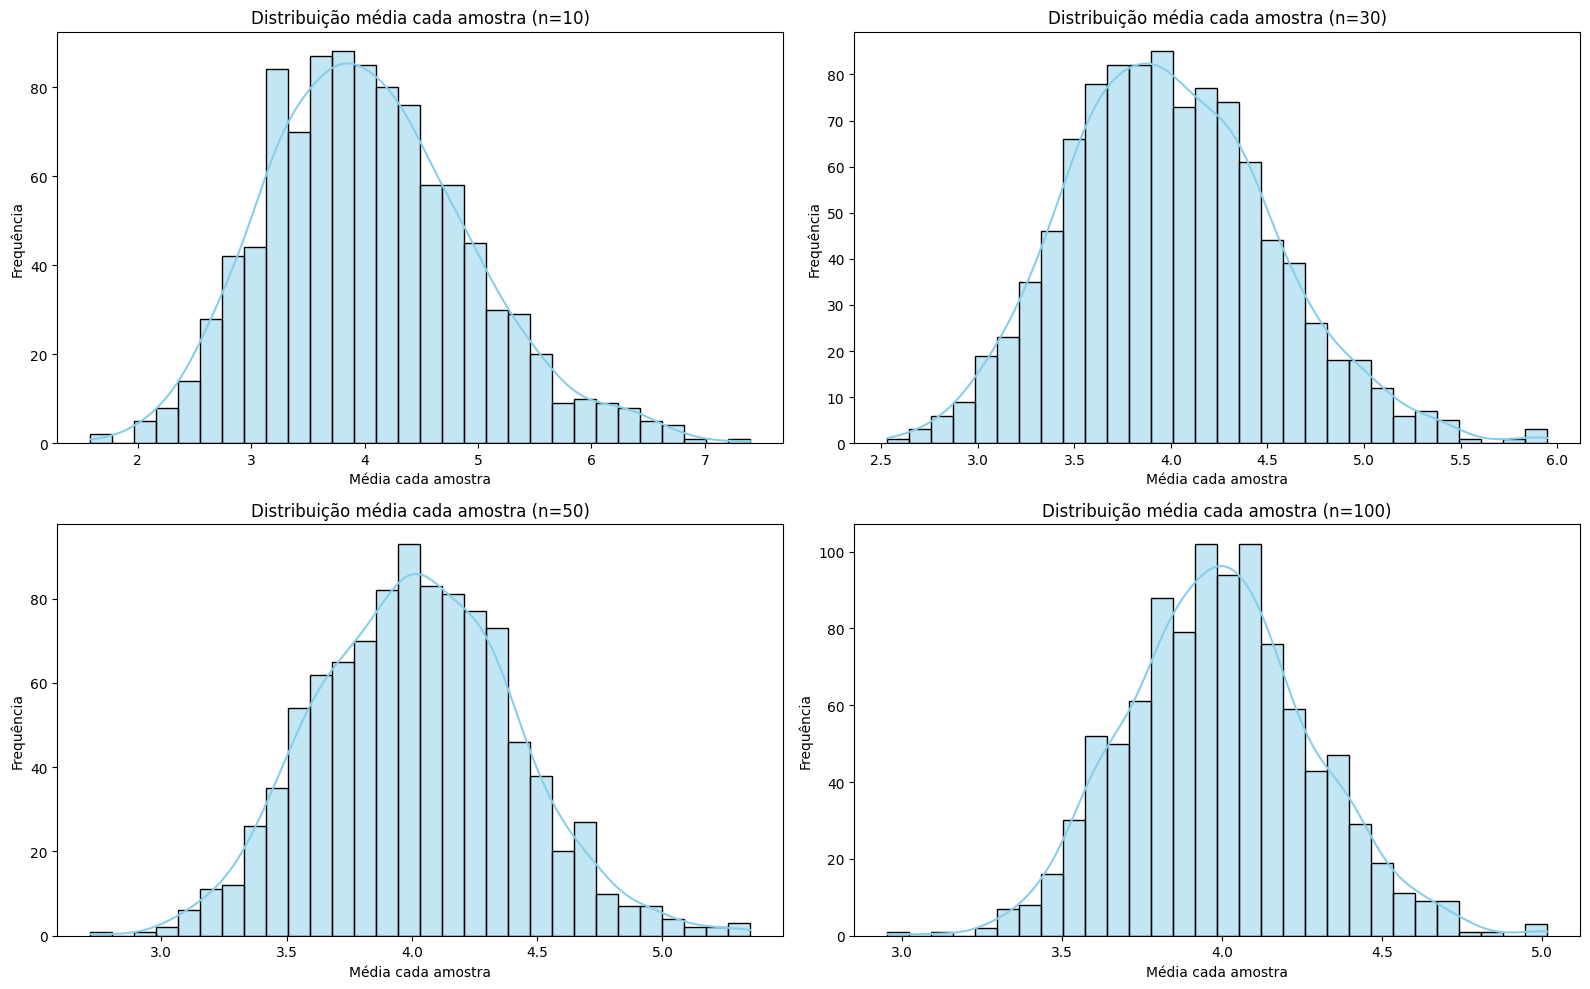

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Definir parâmetros de distribuição gama
shape, scale = 2.0, 2.0
população = np.random.gamma(shape, scale, 100000)

#Tamanhos de amostra para testar
tamanho_sample = [10, 30, 50, 100]

#Visualização
plt.figure(figsize=(16, 10))

#Loop para cada tamanho de amostra
for i, n in enumerate(tamanho_sample):
    means = []
    for _ in range(1000):
        sample = np.random.choice(população, size=n, replace=False)
        means.append(np.mean(sample))

        #Distribuição das médias por cada amostra
    plt.subplot(2, 2, i+1)
    sns.histplot(means, kde=True, bins=30, color='skyblue')
    plt.title(f'Distribuição média cada amostra (n={n})')
    plt.xlabel('Média cada amostra')
    plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

# C: p-value

**Faça um programa que mostra o passo a passo para calcular o p-value do evento abaixo. Coloque figuras para cada passo**

Z-score = 1.50
P-valor (P(X ≥ 8)) = 0.0668


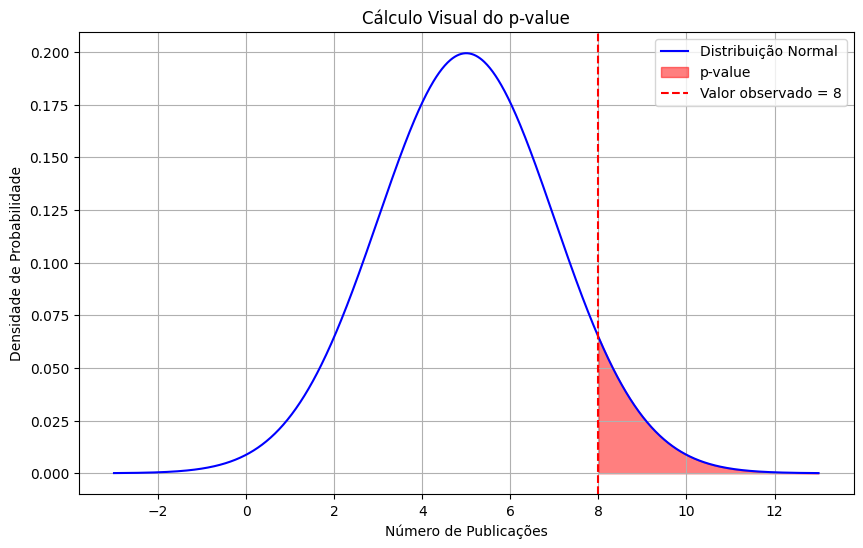

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu = 5       #Valor media população
sigma = 2    #Standard deviation
x_obs = 8    #valor observação (um professor publica 8 artigos)

z = (x_obs - mu) / sigma

p_value = 1 - norm.cdf(z)

print(f"Z-score = {z:.2f}")
print(f"P-valor (P(X ≥ 8)) = {p_value:.4f}")

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição Normal', color='blue')

x_fill = np.linspace(x_obs, mu + 4*sigma, 100)
plt.fill_between(x_fill, norm.pdf(x_fill, mu, sigma), color='red', alpha=0.5, label='p-value')
plt.axvline(x_obs, color='red', linestyle='--', label=f'Valor observado = {x_obs}')

plt.title('Cálculo Visual do p-value')
plt.xlabel('Número de Publicações')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()

# D: p-value

**Crie duas Gaussianas como mostrado abaixo (é só variar a média). Sortei 100 sequências de três valores na azul e para cada sequência calcule o p-value a partir da vermelha. Veja a seta vermelha que indica a partir de qual amostra é calculado p-value. Calcule a taxa de falso negativos (p-value acima de 5%).**

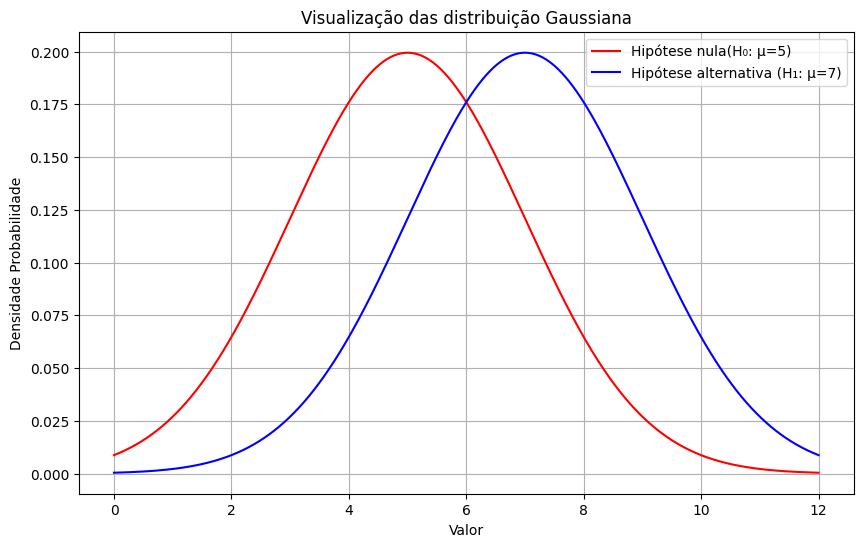

Sample: 100
Total false negative (p-value > 0.05): 49
Persentase false negative: 49.00%


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Determina parâmetros de distribuição
mu_vermelho = 5   # hipótese nula(h0)
mu_azul = 7       # hipótese alternativa(h1)
sigma = 2         # standard deviation
n = 3             # tamanho amostra

#Visualização
x = np.linspace(0, 12, 1000)
y_vermelho = norm.pdf(x, mu_vermelho, sigma)
y_azul = norm.pdf(x, mu_azul, sigma)

plt.figure(figsize=(10,6))
plt.plot(x, y_vermelho, color='red', label='Hipótese nula(H₀: μ=5)')
plt.plot(x, y_azul, color='blue', label='Hipótese alternativa (H₁: μ=7)')
plt.title("Visualização das distribuição Gaussiana")
plt.xlabel("Valor")
plt.ylabel("Densidade Probabilidade")
plt.legend()
plt.grid(True)
plt.show()

#Simulação: Pega 100 amostras da hipótese alternativa(h1) e calcular o p-value
np.random.seed(42)
tamanho_sample = 100
false_negatives = 0
p_values = []

for i in range(tamanho_sample):
    sample = np.random.normal(mu_azul, sigma, n)
    média_sample = np.mean(sample)


    #Calcular z-score
    z = (média_sample - mu_vermelho) / (sigma / np.sqrt(n))

    #Calcular p-value
    p_value = 1 - norm.cdf(z)
    p_values.append(p_value)


    if p_value > 0.05:
        false_negatives += 1


print(f"Sample: {tamanho_sample}")
print(f"Total false negative (p-value > 0.05): {false_negatives}")
print(f"Persentase false negative: {false_negatives / tamanho_sample:.2%}")